In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
file_path = '../../datasets/joint_positions_data_1000.csv'
data = pd.read_csv(file_path)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   x         1000 non-null   float64
 1   y         1000 non-null   float64
 2   pitch     1000 non-null   float64
 3   shoulder  1000 non-null   float64
 4   elbow     1000 non-null   float64
 5   wrist     1000 non-null   float64
dtypes: float64(6)
memory usage: 47.0 KB


## Visualizing the Shape of the Task Space

In [4]:
# computing average max distance
num_of_rows = 20
largest_pairs = data.nlargest(num_of_rows, ['x', 'y'])

distances = []

for index, row in largest_pairs.iterrows():
    dist = np.sqrt( row['x']**2 + row['y']**2 )
    distances.append(dist)

print(sum(distances) / num_of_rows)

0.4053366009167979


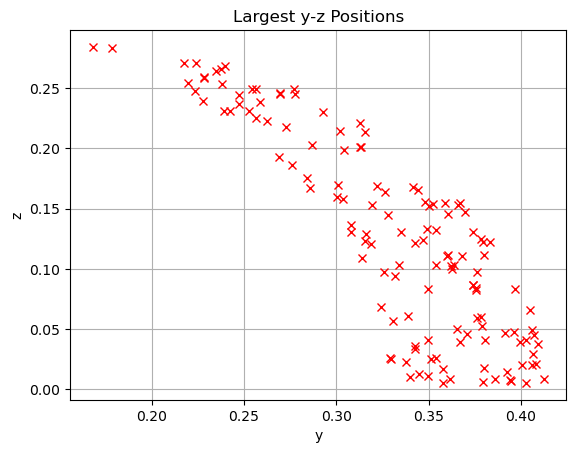

In [5]:
# filter out everything that has a distance < threshold
def isFar(y, z):
    threshold = 0.33
    return (np.sqrt(y**2 + z**2) >= threshold) & (y > 0) & (z > 0)

largest_points = data.loc[isFar(data['x'], data['y']), ['x', 'y']]
largest_points

plt.plot(largest_points.loc[:, 'x'], largest_points.loc[:, 'y'], 'xr')
plt.xlabel('y')
# plt.xlim([0, 0.35])
plt.ylabel('z')
plt.title('Largest y-z Positions')
plt.grid(True)
plt.show()

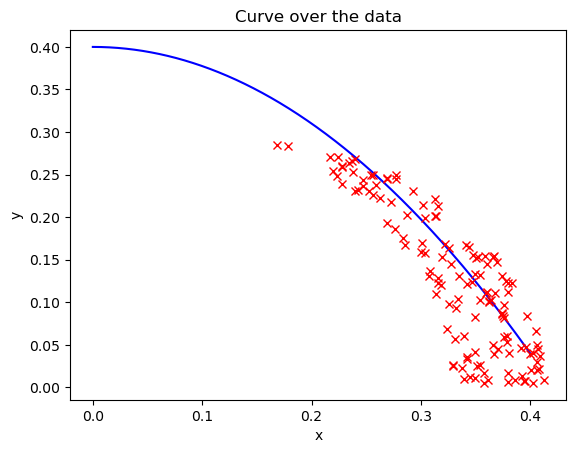

In [6]:
# plotting a curve over the data
y = np.linspace(0, 0.4, 1000)
z = -2.25 * np.square(y) + 0.4

plt.plot(y, z, '-b')
plt.plot(largest_points.loc[:, 'x'], largest_points.loc[:, 'y'], 'xr')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Curve over the data')
plt.show()

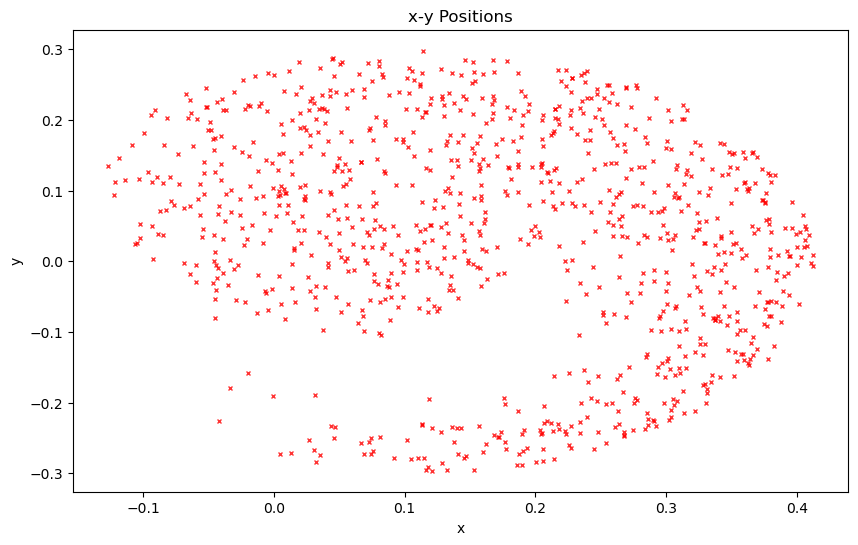

In [7]:
# plotting the data
plt.figure(figsize=(10, 6))
plt.plot(data['x'], data['y'], 'xr', markersize=2.5, alpha=0.8)
plt.title('x-y Positions')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Visualizing the Space of Joint States

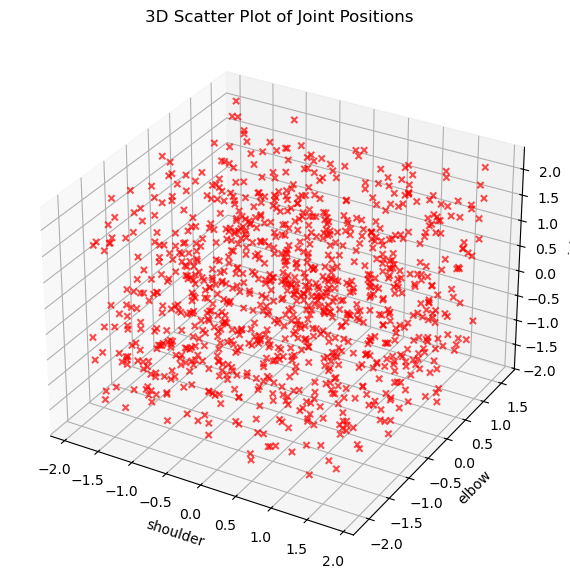

In [10]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['shoulder'], data['elbow'], data['wrist'], c='r', marker='x', alpha=0.7)
ax.set_xlabel('shoulder')
ax.set_ylabel('elbow')
ax.set_zlabel('wrist')
ax.set_title('3D Scatter Plot of Joint Positions')
plt.show()